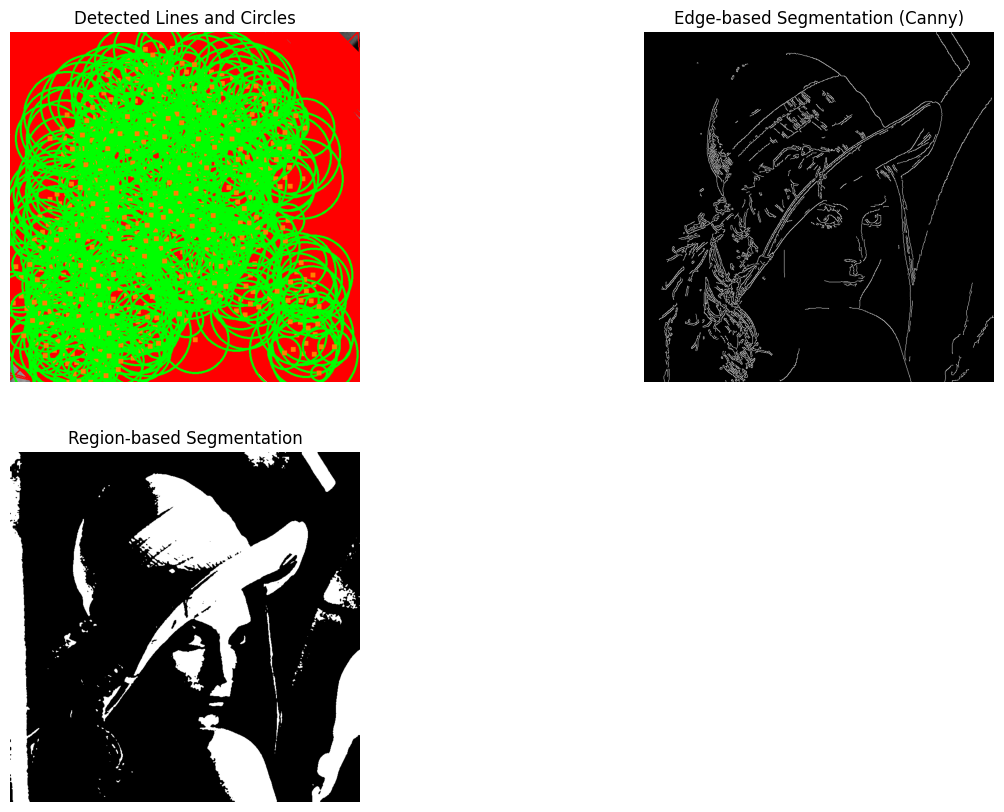

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for edge-based segmentation using Canny edge detection
def edge_based_segmentation(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    return edges

# Function for region-based segmentation
def region_based_segmentation(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply thresholding to segment regions
    _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

    return thresh

# Function for Hough transform to detect lines and circles
def hough_transform(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise before applying the Hough Transform
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(blurred, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=100)

    return lines, circles

# Function to visualize the results
def visualize_results(image_path):
    # Edge-based segmentation
    edges = edge_based_segmentation(image_path)

    # Region-based segmentation
    region = region_based_segmentation(image_path)

    # Hough Transform (lines and circles)
    lines, circles = hough_transform(image_path)

    # Read original image for visualization
    image = cv2.imread(image_path)

    # Draw lines from Hough Transform
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Draw circles from Hough Transform
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # Plot all results
    plt.figure(figsize=(15, 10))

    # Original Image with Hough Transforms
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Lines and Circles')
    plt.axis('off')

    # Edge-based segmentation result
    plt.subplot(2, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge-based Segmentation (Canny)')
    plt.axis('off')

    # Region-based segmentation result
    plt.subplot(2, 2, 3)
    plt.imshow(region, cmap='gray')
    plt.title('Region-based Segmentation')
    plt.axis('off')

    plt.show()

# Path to the image
image_path = '/content/lba1_image_video.jpg' # Make sure to replace with your actual image path

# Visualize all the results
visualize_results(image_path)